In [15]:
import numpy as np
import pandas as pd
from scipy.stats import mode
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

In [16]:
data = pd.read_csv('Training.csv')

In [61]:
data.drop(columns=['Unnamed: 133'],inplace=True)

In [62]:
disease_counts = data["prognosis"].value_counts()

In [63]:
tempdf = pd.DataFrame({"Disease": disease_counts.index,"Counts": disease_counts.values})

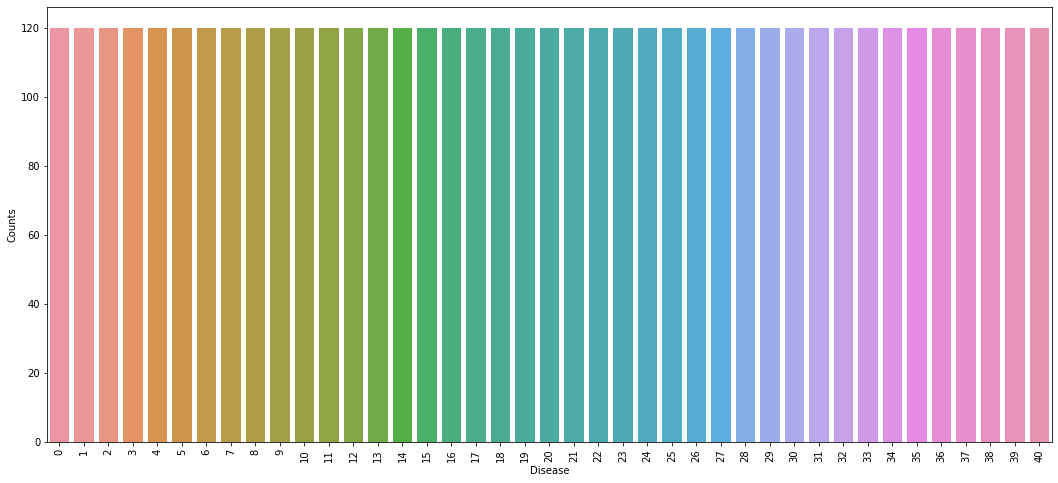

In [64]:
plt.figure(figsize = (18,8))
sns.barplot(x = "Disease", y = "Counts", data = tempdf)
plt.xticks(rotation=90)
plt.show()

In [65]:
encoder = LabelEncoder()
data["prognosis"] = encoder.fit_transform(data["prognosis"])

In [66]:
X = data.iloc[:,:-1]
Y = data.iloc[:,-1]
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,
                                                 random_state=0)

In [67]:
data.iloc[:,-1]

0       15
1       15
2       15
3       15
4       15
        ..
4915     0
4916     2
4917    38
4918    35
4919    27
Name: prognosis, Length: 4920, dtype: int64

In [68]:
data.columns

Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue',
       ...
       'blackheads', 'scurring', 'skin_peeling', 'silver_like_dusting',
       'small_dents_in_nails', 'inflammatory_nails', 'blister',
       'red_sore_around_nose', 'yellow_crust_ooze', 'prognosis'],
      dtype='object', length=133)

In [78]:
def cv_scoring(estimator, X, y):
    return accuracy_score(y, estimator.predict(X))

models = {
    "SVC":SVC(),
    "Gaussian NB":GaussianNB(),
    "Random Forest":RandomForestClassifier(random_state=18)
}
for model_name in models:
    model = models[model_name]
    scores = cross_val_score(model, X, Y, cv = 10,
                             n_jobs = -1,
                             scoring = cv_scoring)
    print("=="*30)
    print(model_name)
    print(f"Scores: {scores}")
    print(f"Mean Score: {np.mean(scores)}")

SVC
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0
Gaussian NB
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0
Random Forest
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0


In [84]:
svm_model = SVC()
svm_model.fit(X_train,y_train)
preds = svm_model.predict(X_test)
print(f"Accuracy on train data by SVM Classifier\
: {accuracy_score(y_train, svm_model.predict(X_train))*100}")

Accuracy on train data by SVM Classifier: 100.0


In [86]:
print(f"Accuracy on test data by SVM Classifier\
: {accuracy_score(y_test, preds)*100}")
cf_matrix = confusion_matrix(y_test, preds)
cf_matrix

Accuracy on test data by SVM Classifier: 100.0


array([[18,  0,  0, ...,  0,  0,  0],
       [ 0, 22,  0, ...,  0,  0,  0],
       [ 0,  0, 31, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ..., 20,  0,  0],
       [ 0,  0,  0, ...,  0, 28,  0],
       [ 0,  0,  0, ...,  0,  0, 24]])

In [87]:
nb_model = GaussianNB()
nb_model.fit(X_train,y_train)
prediction = nb_model.predict(X_test)
print(accuracy_score(y_train, nb_model.predict(X_train)))

1.0


In [89]:
rf_model = RandomForestClassifier(random_state=10)
rf_model.fit(X_train,y_train)
prediction = rf_model.predict(X_test)
accuracy_score(y_train, rf_model.predict(X_train))

1.0